X:
 [[1.4]
 [1.3]
 [1.5]
 [4.5]
 [4.1]
 [4.6]]
y:
 [0 0 0 1 1 1]


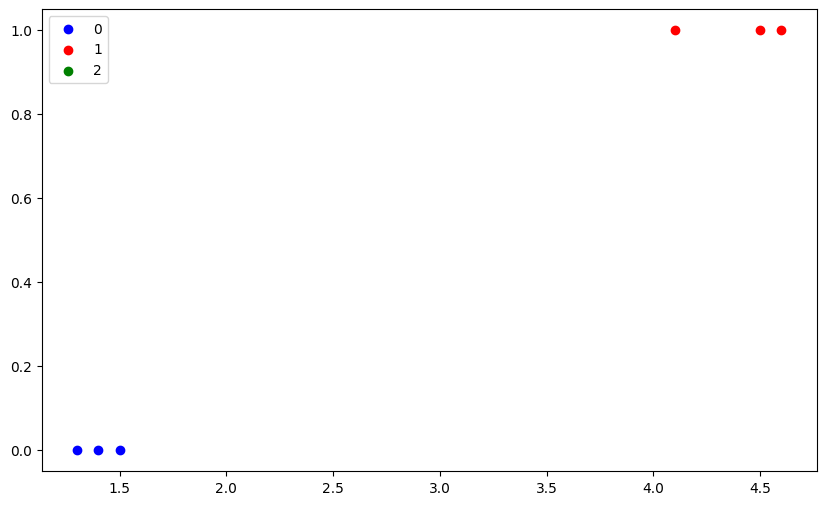

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn import preprocessing

iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]

# change data type
y = y.astype('uint8')

print('X:\n', X)
print('y:\n', y)

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.scatter(X[y == 2][:, 0], y[y == 2], color='g', label='2')
plt.legend()
plt.show()

In [2]:
N = 6 # numbers of samples
k = 2 # number of classes

# one_hot
import numpy as np

def convert_one_hot(y, k):  
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_one_hot = convert_one_hot(y, k)
print('y_one_hot\n', y_one_hot)

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
print('X\n', X)

y_one_hot
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
X
 [[1.  1.4]
 [1.  1.3]
 [1.  1.5]
 [1.  4.5]
 [1.  4.1]
 [1.  4.6]]


In [3]:
# initialize parameters
#theta = np.array([[0.1, 0.05], 
#                  [0.2, -0.1]])

theta = np.array([[0.0, 0.0], 
                  [0.0, 0.0]])
print('theta:\n', theta)

theta:
 [[0. 0.]
 [0. 0.]]


In [4]:
# some parameters
learning_rate = 0.1
losses = []
num_iter = 100

for epoch in range(num_iter):
    for i in range(N): 
        xi = X[i]
        yi = y_one_hot[i]
        
        xi = xi.reshape((2,1))
        yi = yi.reshape((2,1))
        
        # compute z
        z = theta.T.dot(xi)        
                
        # compute y_hat
        exp_z = np.exp(z)
        y_hat = exp_z / np.sum(exp_z, axis=0)
        
        # compute the loss
        loss = -np.log(yi.T.dot(y_hat))
        losses.append(loss[0])
        
        # compute the gradient dz
        dz = y_hat - yi
        
        # compute dtheta
        dtheta = xi.dot(dz.T)
        
        # update
        theta = theta - learning_rate*dtheta  

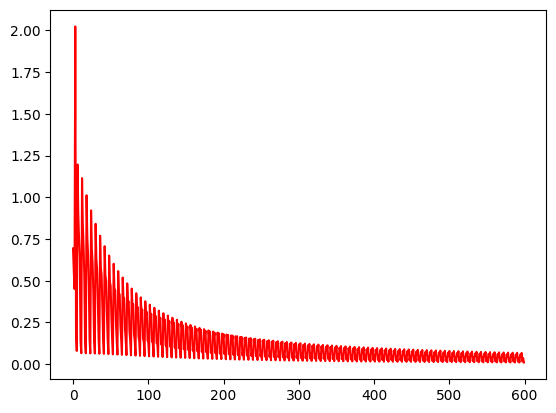

In [5]:
x_axis = range(len(losses))
plt.plot(x_axis,losses, color="r")
plt.show()

In [6]:
print(theta)

[[ 3.05829136 -3.05829136]
 [-1.16743453  1.16743453]]


In [10]:
z = X@theta
print(z)

[[ 1.42388302 -1.42388302]
 [ 1.54062647 -1.54062647]
 [ 1.30713957 -1.30713957]
 [-2.19516402  2.19516402]
 [-1.72819021  1.72819021]
 [-2.31190748  2.31190748]]


In [15]:
exp_z = np.exp(z)
y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)
print(y_hat)

[[0.94520309 0.05479691]
 [0.95611279 0.04388721]
 [0.93177493 0.06822507]
 [0.01224487 0.98775513]
 [0.03057915 0.96942085]
 [0.00971988 0.99028012]]
